In [13]:
import math

import array as arr
import ROOT as rt

rt.gStyle.SetOptStat(0)

In [25]:
# divide two tgrapherrors and store result in a new tgrapherrors
def divide_graphs(x, y):

    # create a new tgrapherrors
    gr = rt.TGraphErrors()

    # loop over all points in the tgrapherrors
    for i in range(0, x.GetN()):
        # get the x and y values
        x1 = x.GetX()[i]
        y1 = x.GetY()[i]
        x2 = y.GetX()[i]
        y2 = y.GetY()[i]

        # calculate the error
        ex1 = x.GetErrorX(i)
        ey1 = x.GetErrorY(i)
        ex2 = y.GetErrorX(i)
        ey2 = y.GetErrorY(i)

        # calculate the result
        if y2 != 0:
            result = y1 / y2
            err = result * math.sqrt((ey1 / y1)**2 + (ey2 / y2)**2)
        else:
            result = 0
            err = 0

        # add the result to the tgrapherrors
        gr.SetPoint(i, x1, result)
        gr.SetPointError(i, ex1, err)

    return gr

In [26]:
# adds all of the points on the graph together with errors
def add_graphs(graph_list):
    n_points = graph_list[0].GetN()

    x = arr.array('d', [0.]*n_points)
    y = arr.array('d', [0.]*n_points)
    x_error = arr.array('d', [0.]*n_points)
    y_error = arr.array('d', [0.]*n_points)

    for graph in graph_list:
        for i in range(n_points):
            x[i] = graph.GetX()[i]
            y[i] += graph.GetY()[i]
            x_error[i] = graph.GetErrorX(i)
            y_error[i] += graph.GetErrorY(i)**2
    
    for i in range(n_points):
        y_error[i] = math.sqrt(y_error[i])
    
    return rt.TGraphErrors(n_points, x, y, x_error, y_error)

In [39]:
# scales a TGraphErrors by a constant
def scale_graph(graph, scale):
    n_points = graph.GetN()
    x = arr.array('d', [0.]*n_points)
    y = arr.array('d', [0.]*n_points)
    x_error = arr.array('d', [0.]*n_points)
    y_error = arr.array('d', [0.]*n_points)

    for i in range(n_points):
        x[i] = graph.GetX()[i]
        y[i] = graph.GetY()[i] * scale
        x_error[i] = graph.GetErrorX(i)
        y_error[i] = graph.GetErrorY(i) * scale

    return rt.TGraphErrors(n_points, x, y, x_error, y_error)

In [67]:
# get lambda pt input file
lambda_file = rt.TFile("published_data/lambda_pt_cent_0_40.root")

phi_file_0_5 = rt.TFile("published_data/phi_pt_cent_0_5.root")
phi_file_5_10 = rt.TFile("published_data/phi_pt_cent_5_10.root")
phi_file_10_20 = rt.TFile("published_data/phi_pt_cent_10_20.root")

lambda_cent_file = rt.TFile("published_data/lambda_pt_integrated.root")
phi_cent_file = rt.TFile("published_data/phi_pt_integrated.root")

bin_widths = []
tmp_hist = lambda_file.Get("Table 9").Get("Hist1D_y1") 
n_bins = tmp_hist.GetNbinsX()
for i in range(n_bins):
    bin_widths.append(tmp_hist.GetBinLowEdge(i+1))
bin_widths.append(tmp_hist.GetBinLowEdge(tmp_hist.GetNbinsX())+tmp_hist.GetBinWidth(tmp_hist.GetNbinsX()))
bin_widths = arr.array('d', bin_widths)

cent_bin_widths = []
tmp_hist = lambda_cent_file.Get("Table 27").Get("Hist1D_y1") 
n_bins_cent = tmp_hist.GetNbinsX()
for i in range(n_bins_cent):
    cent_bin_widths.append(tmp_hist.GetBinLowEdge(i+1))
cent_bin_widths.append(tmp_hist.GetBinLowEdge(tmp_hist.GetNbinsX())+tmp_hist.GetBinWidth(tmp_hist.GetNbinsX()))
cent_bin_widths = arr.array('d', cent_bin_widths)




# make a histogram with the same binning as tmp_hist

lambda_pt_graph_cent_0_5 = lambda_file.Get("Table 9").Get("Graph1D_y1")
lambda_pt_graph_cent_5_10 = lambda_file.Get("Table 9").Get("Graph1D_y2")
lambda_pt_graph_cent_10_20 = lambda_file.Get("Table 9").Get("Graph1D_y3")
lambda_pt_integrated = lambda_cent_file.Get("Table 27").Get("Graph1D_y1")

phi_pt_graph_cent_0_5 = phi_file_0_5.Get("Table 9").Get("Graph1D_y1")
phi_pt_graph_cent_5_10 = phi_file_5_10.Get("Table 10").Get("Graph1D_y1")
phi_pt_graph_cent_10_20 = phi_file_10_20.Get("Table 11").Get("Graph1D_y1")
phi_pt_integrated = phi_cent_file.Get("Table 18").Get("Graph1D_y1")

lambda_pt_graph_cent_0_20 = add_graphs([lambda_pt_graph_cent_0_5, lambda_pt_graph_cent_5_10, lambda_pt_graph_cent_10_20])
phi_pt_graph_cent_0_20 = add_graphs([phi_pt_graph_cent_0_5, phi_pt_graph_cent_5_10, phi_pt_graph_cent_10_20])

# scale lambda results by 2pi
lambda_pt_graph_cent_0_20 = scale_graph(lambda_pt_graph_cent_0_20, 2*rt.TMath.Pi())

lambda_approximate_2_4_yield = 0
phi_approximate_2_4_yield = 0

lambda_approximate_2_4_yield_error = 0
phi_approximate_2_4_yield_error = 0

for i in range(lambda_pt_graph_cent_0_20.GetN()):
    if 1.89 < lambda_pt_graph_cent_0_20.GetX()[i] < 3.96:
        lambda_approximate_2_4_yield += lambda_pt_graph_cent_0_20.GetY()[i]
        lambda_approximate_2_4_yield_error += lambda_pt_graph_cent_0_20.GetErrorY(i)**2
    if 1.89 < phi_pt_graph_cent_0_20.GetX()[i] < 3.96:
        phi_approximate_2_4_yield += phi_pt_graph_cent_0_20.GetY()[i]
        phi_approximate_2_4_yield_error += phi_pt_graph_cent_0_20.GetErrorY(i)**2

lambda_approximate_2_4_yield_error = rt.TMath.Sqrt(lambda_approximate_2_4_yield_error)
phi_approximate_2_4_yield_error = rt.TMath.Sqrt(phi_approximate_2_4_yield_error)

approximate_lambda_phi_ratio_2_4 = lambda_approximate_2_4_yield / phi_approximate_2_4_yield

approximate_lambda_phi_ratio_2_4_error = approximate_lambda_phi_ratio_2_4 * rt.TMath.Sqrt((lambda_approximate_2_4_yield_error/lambda_approximate_2_4_yield)**2 + (phi_approximate_2_4_yield_error/phi_approximate_2_4_yield)**2)
print("approximate lambda/phi ratio 2-4: ", approximate_lambda_phi_ratio_2_4, " +/- ", approximate_lambda_phi_ratio_2_4_error)


# lambda_over_phi_graph_cent_0_20 = divide_graphs(lambda_pt_graph_cent_0_20, phi_pt_graph_cent_0_20)
# lambda_over_phi_pt_integrated = divide_graphs(lambda_pt_integrated, phi_pt_integrated)

approximate lambda/phi ratio 2-4:  3.0892386230291327  +/-  0.10531065643266128


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TFile::Append>: Replacing existing TH1: plotting_hist (Potential memory leak).
Info in <TCanvas::Print>: pdf file figures/lambda_phi_pt_cent_0_20.pdf has been created


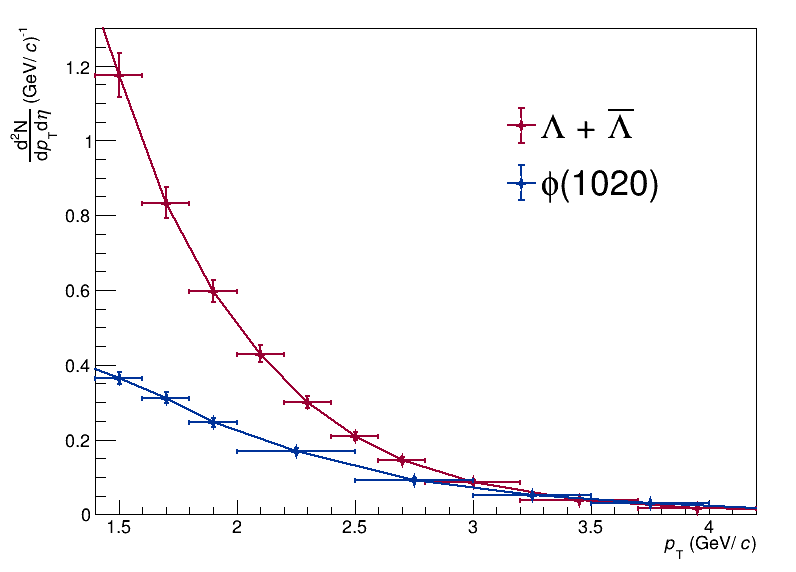

In [83]:
c = rt.TCanvas("c", "c", 800, 600)
c.SetLeftMargin(0.12)
c.SetBottomMargin(0.10)
c.SetRightMargin(0.05)
c.SetTopMargin(0.05)

plotting_hist = rt.TH1D("plotting_hist", "", n_bins, bin_widths)

plotting_hist.GetYaxis().SetTitle("#frac{d^{2}N}{d#it{p}_{T}d#it{#eta}} (GeV/#it{c})^{-1}")
plotting_hist.GetYaxis().SetTitleOffset(1.4)
plotting_hist.GetXaxis().SetTitle("#it{p}_{T} (GeV/#it{c})")
plotting_hist.GetXaxis().SetRangeUser(1.5, 4.2)

lambda_pt_graph_cent_0_20.SetMarkerStyle(43)
lambda_pt_graph_cent_0_20.SetMarkerSize(2)
lambda_pt_graph_cent_0_20.SetMarkerColor(rt.kPink - 6)
lambda_pt_graph_cent_0_20.SetLineColor(rt.kPink - 6)
lambda_pt_graph_cent_0_20.SetLineWidth(2)

phi_pt_graph_cent_0_20.SetMarkerStyle(43)
phi_pt_graph_cent_0_20.SetMarkerSize(2)
phi_pt_graph_cent_0_20.SetMarkerColor(rt.kAzure - 6)
phi_pt_graph_cent_0_20.SetLineColor(rt.kAzure - 6)
phi_pt_graph_cent_0_20.SetLineWidth(2)

leg = rt.TLegend(0.63, 0.63, 0.83, 0.83)
leg.AddEntry(lambda_pt_graph_cent_0_20, "#Lambda + #bar{#Lambda}", "LPE")
leg.AddEntry(phi_pt_graph_cent_0_20, "#phi(1020)", "LPE")
leg.SetBorderSize(0)


plotting_hist.GetYaxis().SetRangeUser(0, 1.3)
plotting_hist.Draw()
lambda_pt_graph_cent_0_20.Draw("LP SAME")
phi_pt_graph_cent_0_20.Draw("LP SAME")
leg.Draw("same")
c.Draw()
c.SaveAs("figures/lambda_phi_pt_cent_0_20.pdf")


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <TFile::Append>: Replacing existing TH1: plotting_hist2 (Potential memory leak).


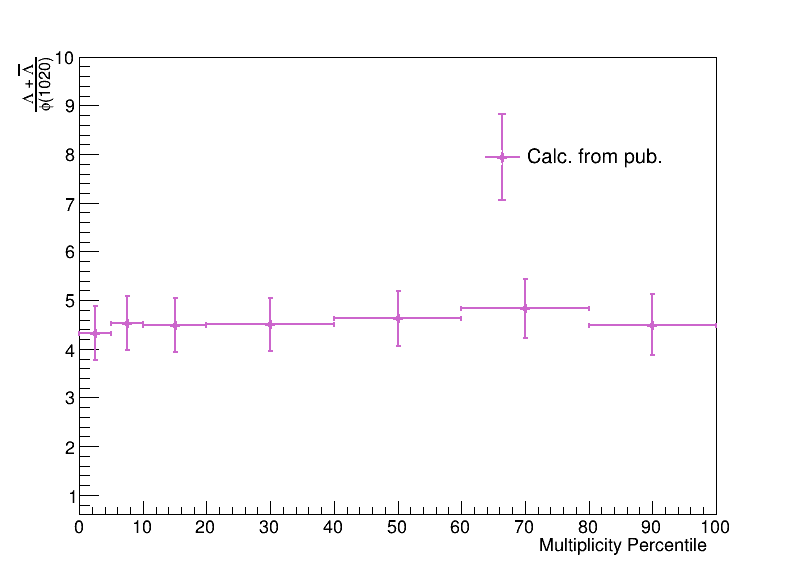

In [57]:
c2 = rt.TCanvas("c2", "c2", 800, 600)
plotting_hist2 = rt.TH1D("plotting_hist2", "", n_bins_cent, cent_bin_widths)

plotting_hist2.GetXaxis().SetTitle("Multiplicity Percentile")
plotting_hist2.GetYaxis().SetTitleSize(0.03)
plotting_hist2.GetYaxis().SetTitle("#frac{#Lambda + #bar{#Lambda}}{#phi(1020)}")

lambda_over_phi_pt_integrated.SetMarkerStyle(43)
lambda_over_phi_pt_integrated.SetMarkerSize(2)
lambda_over_phi_pt_integrated.SetMarkerColor(rt.kMagenta - 6)
lambda_over_phi_pt_integrated.SetLineColor(rt.kMagenta - 6)
lambda_over_phi_pt_integrated.SetLineWidth(2)

leg = rt.TLegend(0.6, 0.6, 0.85, 0.85)
leg.AddEntry(lambda_over_phi_pt_integrated, "Calc. from pub.", "LPE")
leg.SetBorderSize(0)


plotting_hist2.GetYaxis().SetRangeUser(0.6, 10)
plotting_hist2.Draw()
lambda_over_phi_pt_integrated.Draw("PE")
leg.Draw("same")
c2.Draw()